# Telecom Customer Churn Case Study

You have been provided with a dataset related to telecom customer churn. Each row in the dataset represents a unique customer, and the columns contain various attributes and information about these customers.

The data set includes information about:
- Churn Column: Indicates customer churn within the last month.
- Services Info: Subscribed services like phone, internet, etc.
- Account Details: Tenure, contract, billing, charges.
- Demographics: Gender, age, and family status.


## Load the dataset in a dataframe

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np 
df= pd.read_csv("telecom_customer_churn.csv")

In [4]:
#1. import the provided dataset to dataframe (telecom_customer_churn.csv)
#2. change the settings to display all the columns
pd.set_option("display.max_columns",None)
#3. check the number of rows and columns
print("shape of Dataset:",df.shape)

#4. check the top 5 rows
df.head()


shape of Dataset: (7043, 21)


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#display all the column names
#df.columns
list(df.columns)



['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'churn']

In [12]:
#How many seperate categorical and numerical columns
num_cols =df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols
cat_cols

                            


Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'total_charges', 'churn'],
      dtype='object')

In [16]:
{
    "Numerical Columns": list(num_cols),
    "Categorical Columns": list(cat_cols)
}

{'Numerical Columns': ['senior_citizen', 'tenure', 'monthly_charges'],
 'Categorical Columns': ['customer_id',
  'gender',
  'partner',
  'dependents',
  'phone_service',
  'multiple_lines',
  'internet_service',
  'online_security',
  'online_backup',
  'device_protection',
  'tech_support',
  'streaming_tv',
  'streaming_movies',
  'contract',
  'paperless_billing',
  'payment_method',
  'total_charges',
  'churn']}

In [25]:
# Check if the dataset contains nulls
#so we will do count of null in each column 
df.isnull().sum()
# or a quick check if any null exists 
df.isnull().values.any()
# in this dataset the sneaky issue is not NaN, it’s " " (empty strings).so i will check for hidden blanks 
(df['total_charges'] == " ").sum()
#If this gives a number > 0, those are “fake nulls” stored as spaces.
#Step 2 Now seeing which rows they really are 
df[df['total_charges'] == " "].head()
#step 3 Now i am convertin this safely to numeric 
df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')


customer_id          7043
gender               7043
senior_citizen       7043
partner              7043
dependents           7043
tenure               7043
phone_service        7043
multiple_lines       7043
internet_service     7043
online_security      7043
online_backup        7043
device_protection    7043
tech_support         7043
streaming_tv         7043
streaming_movies     7043
contract             7043
paperless_billing    7043
payment_method       7043
monthly_charges      7043
total_charges        7043
churn                7043
dtype: int64

In [26]:
df_fix = df.copy()
df_fix = df_fix.dropna(subset=['total_charges'])
df_fix.shape   # check new row count

(7032, 21)

In [27]:
df_fix['total_charges'].isna().sum()

np.int64(0)

In [28]:
#check the datatype of all columns
# check datatypes of all columns
df_fix.dtypes


customer_id           object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [5]:
# Fix the datatype
#convert the datatype of 'monthly_charges', 'total_charges', 'tenure' to numeric datatype (pd.to_numeric)




Q1 - Calculate the mean, median, and mode of the monthly_charges column

In [31]:
#Mean 
mean_val = df_fix['monthly_charges'].mean()
#Median
median_val = df_fix['monthly_charges'].median()
#Mode(can be multiple value)
mode_val = df_fix['monthly_charges'].mode()


In [32]:
print("Mean:", mean_val)
print("Median:", median_val)
print("Mode:", mode_val.values)

Mean: 64.79820819112628
Median: 70.35
Mode: [20.05]


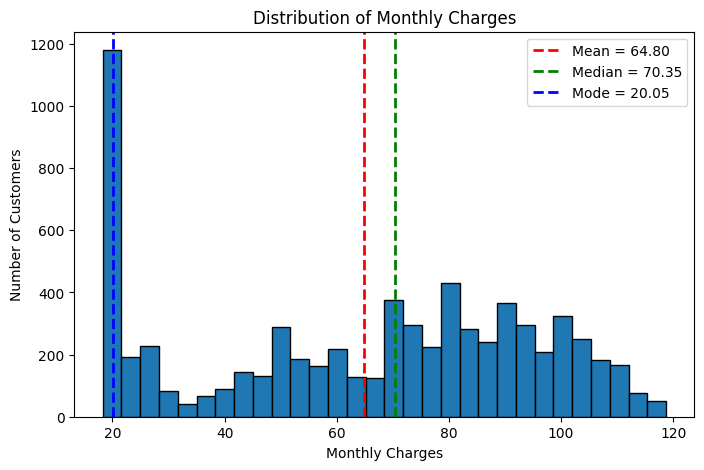

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_fix['monthly_charges'], bins=30, edgecolor='black')
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_val:.2f}")
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f"Median = {median_val:.2f}")
plt.axvline(mode_val.values[0], color='blue', linestyle='dashed', linewidth=2, label=f"Mode = {mode_val.values[0]:.2f}")

plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

Q2 - Calculate the 25th, 50th, and 75th percentiles of the total_charges column

In [39]:
q25 = df_fix['total_charges'].quantile(0.25)
q50 = df_fix['total_charges'].quantile(0.50)  # same as median
q75 = df_fix['total_charges'].quantile(0.75)

q25, q50, q75

(np.float64(401.45), np.float64(1397.475), np.float64(3794.7375))

In [40]:
print("25th percentile (Q1):", q25)
print("50th percentile (Median):", q50)
print("75th percentile (Q3):", q75)

25th percentile (Q1): 401.45
50th percentile (Median): 1397.475
75th percentile (Q3): 3794.7375


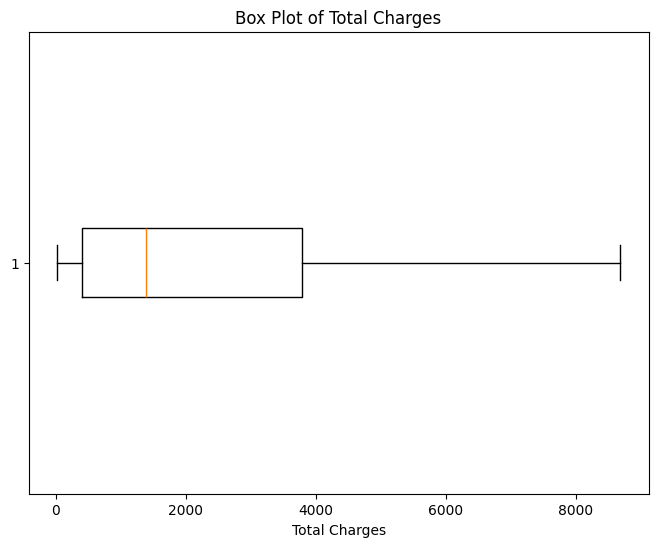

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.boxplot(df_fix['total_charges'].dropna(), vert=False)
plt.title("Box Plot of Total Charges")
plt.xlabel("Total Charges")
plt.show()

Q3 - Calculate the range of monthly_charges column?

Hint - Range is the difference between max and min of monthly_charges.

Q4 - What is the first quartile of the monthly_charges column for customers who have not churned?

Q5 - What is the third quartile of the total_charges column for customers who have churned?

Q6-  What is the mode of the payment method column for customers who have churned?

Q7 - What is the mean of the total charges column for customers who have churned and have a month-to-month contract?

In [8]:
# Filter the rows based on the churn status and contract type


# Calculate the mean of the total charges column


# Print the result


Q8 - What is the median of the tenure column for customers who have not churned and have a two-year contract?

In [9]:
# Filter the rows based on the churn status and contract type


# Calculate the median of the tenure column


# Print the result
